# load data into stata

In [31]:
clear

In [32]:
use AuQuGDP.dta

In [33]:
describe


Contains data from AuQuGDP.dta
  obs:           241                          
 vars:             5                          14 Sep 2020 22:56
 size:         5,302                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
Time            int     %td                   Time
AuGDP           double  %10.0g                AuGDP
quarter         float   %9.0g                 
year            float   %9.0g                 
t               float   %tq                   
--------------------------------------------------------------------------------
Sorted by: t


# (a) Draw a time series graph of GDP. Does the series look stationary?  To confirmyour guess, run the augmented DF test of unit root (to be discussed in details).

## line plot : clearly the line plot shows a trend in the stochastic process. Based on the lecture slides and previous tutorial questions, a process with trend is not stationary (the mean of the process will be time dependent).

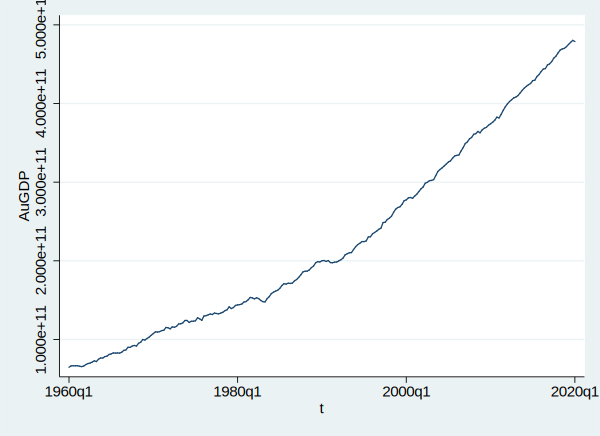

In [34]:
tsline AuGDP

## This doubt can also be verified by the figure of ACF, which decay linearly instead of exponentially.

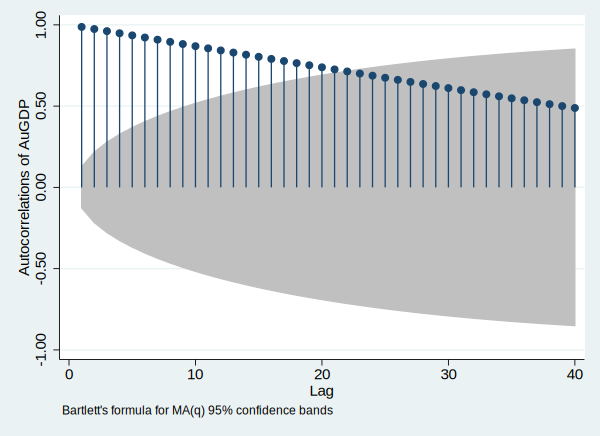

In [35]:
ac AuGDP

## The ADF test formally confirms this idea. In ADF test, H0 is that the process has unit root and H1 is the opposite. Clearly from the table below, p-value for H0 is almost 1, which means it is highly likely that the unit root exists in thie process.

In [36]:
dfuller AuGDP, lags(3) trend regress


Augmented Dickey-Fuller test for unit root         Number of obs   =       237

                               ---------- Interpolated Dickey-Fuller ---------
                  Test         1% Critical       5% Critical      10% Critical
               Statistic           Value             Value             Value
------------------------------------------------------------------------------
 Z(t)             -0.444            -3.994            -3.432            -3.132
------------------------------------------------------------------------------
MacKinnon approximate p-value for Z(t) = 0.9855

------------------------------------------------------------------------------
D.AuGDP      |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       AuGDP |
         L1. |  -.0018764     .00423    -0.44   0.658    -.0102106    .0064579
         LD. |  -.0075983   .0668139    -0.11   0.910    -.1392409 

# (b) first-order differencing AuGDP

In [37]:
gen GDP_D1 = S1.AuGDP

(1 missing value generated)


In [38]:
list in 1/10


     +-------------------------------------------------------------+
     |      Time       AuGDP   quarter   year        t      GDP_D1 |
     |-------------------------------------------------------------|
  1. | 01jan1960   6.468e+10         1   1960   1960q1           . |
  2. | 01apr1960   6.647e+10         2   1960   1960q2    1.79e+09 |
  3. | 01jul1960   6.662e+10         3   1960   1960q3    1.50e+08 |
  4. | 01oct1960   6.649e+10         4   1960   1960q4   -1.33e+08 |
  5. | 01jan1961   6.669e+10         1   1961   1961q1    2.00e+08 |
     |-------------------------------------------------------------|
  6. | 01apr1961   6.596e+10         2   1961   1961q2   -7.32e+08 |
  7. | 01jul1961   6.549e+10         3   1961   1961q3   -4.72e+08 |
  8. | 01oct1961   6.623e+10         4   1961   1961q4    7.46e+08 |
  9. | 01jan1962   6.809e+10         1   1962   1962q1    1.86e+09 |
 10. | 01apr1962   6.940e+10         2   1962   1962q2    1.30e+09 |
     +---------------------------

## the line plot of GDP_D1 is much similar to a stationary process fluctuating around a certin value.

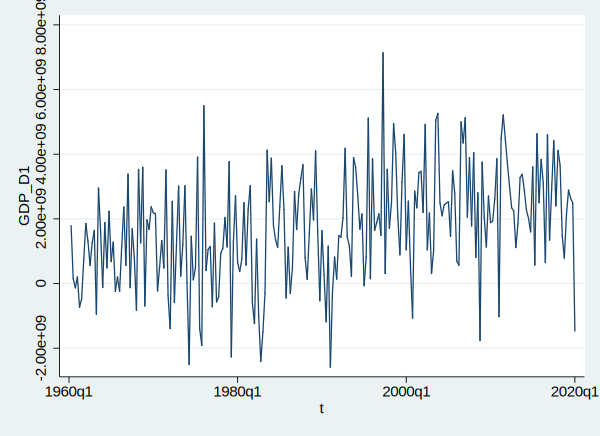

In [39]:
tsline GDP_D1

## Run the ADF test on GDP_D1, returning the p-value of H0 is 0. This implies that, for GDP_D1, unit root is almost impossible.

In [40]:
dfuller GDP_D1, lags(3) trend regress


Augmented Dickey-Fuller test for unit root         Number of obs   =       236

                               ---------- Interpolated Dickey-Fuller ---------
                  Test         1% Critical       5% Critical      10% Critical
               Statistic           Value             Value             Value
------------------------------------------------------------------------------
 Z(t)             -8.027            -3.995            -3.432            -3.132
------------------------------------------------------------------------------
MacKinnon approximate p-value for Z(t) = 0.0000

------------------------------------------------------------------------------
D.GDP_D1     |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      GDP_D1 |
         L1. |  -1.034236    .128844    -8.03   0.000    -1.288101   -.7803701
         LD. |   .0312481   .1138244     0.27   0.784    -.1930237 

# (c) Plot autocorrelation and partial autocorrelation for GDP_D1

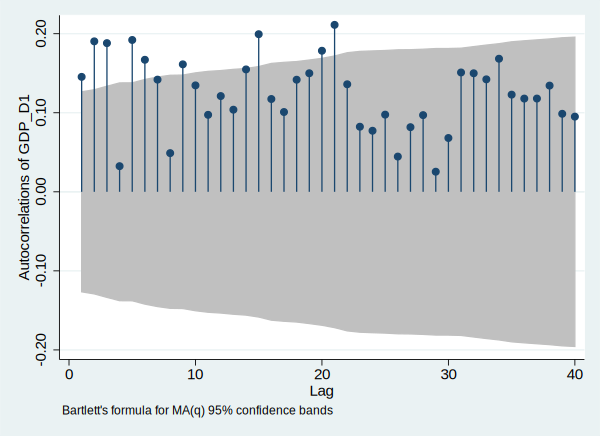

In [41]:
ac GDP_D1

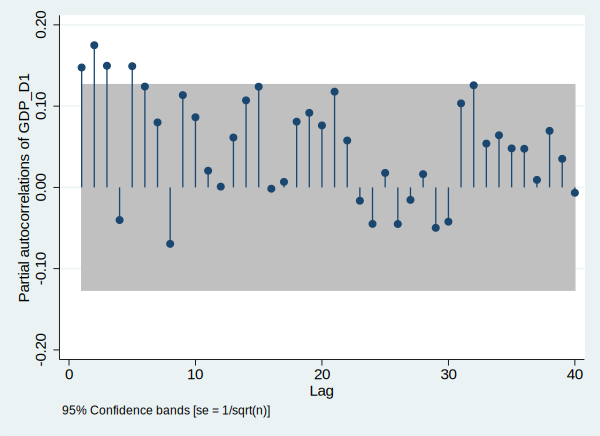

In [42]:
pac GDP_D1

# (d) 
## The autocorrelation of GDP_D1 shows that the first 5 period ACF value is outside the 95% confidence band. Hence, I choose order of AR to be 5 as the starting point. Some of you may argue the ACF value around Lag 20 are also outside the band, implying that we need to choose $p = 20$. In the video I showed that 20 is a worse choice relative to 5. Plz see the stata video for detail. 

## Please note that this method is very informal and can only be used as the starting point of modelling. The rigorous method is based on IC or cross-validation. 

In [43]:
arima GDP_D1 if t<=tq(2018q4), arima(5,0,0)


(setting optimization to BHHH)
Iteration 0:   log likelihood = -5319.9281  
Iteration 1:   log likelihood =  -5319.909  
Iteration 2:   log likelihood = -5319.9076  
Iteration 3:   log likelihood = -5319.9075  
Iteration 4:   log likelihood = -5319.9074  
(switching optimization to BFGS)
BFGS stepping has contracted, resetting BFGS Hessian (0)
Iteration 5:   log likelihood = -5319.9074  
Iteration 6:   log likelihood = -5319.9074  (backed up)
Iteration 7:   log likelihood = -5319.9074  

ARIMA regression

Sample:  1960q2 - 2018q4                        Number of obs     =        235
                                                Wald chi2(5)      =      19.92
Log likelihood = -5319.907                      Prob > chi2       =     0.0013

------------------------------------------------------------------------------
             |                 OPG
      GDP_D1 |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+-------------------------------------------

## IC is estimated for question (g)

In [44]:
estat ic
matrix M_AR_IC=r(S)
scalar aic_ar = M_AR_IC[1, 5]
scalar bic_ar = M_AR_IC[1, 6]



Akaike's information criterion and Bayesian information criterion

-----------------------------------------------------------------------------
       Model |        Obs  ll(null)  ll(model)      df         AIC        BIC
-------------+---------------------------------------------------------------
           . |        235         .  -5319.907       7    10653.81   10678.03
-----------------------------------------------------------------------------
               Note: N=Obs used in calculating BIC; see [R] BIC note.





# (e) 
## one-quarter ahead prediction based on AR(1) since 2018q4

In [45]:
predict yhat_AR_1 if t==tq(2019q1)
predict resd_AR_1 if t==tq(2019q1), residuals


(option xb assumed; predicted values)
(240 missing values generated)

(240 missing values generated)


In [46]:
list t yhat_AR_1 GDP_D1 resd_AR_1 if t==tq(2019q1)


     +-----------------------------------------+
     |      t   yhat_A~1     GDP_D1   resd_A~1 |
     |-----------------------------------------|
237. | 2019q1   1.72e+09   2.13e+09   4.11e+08 |
     +-----------------------------------------+


## 4-quarter ahead prediction based on AR(5) since 2018q4

In [47]:
predict yhat_AR_4 if t>=tq(2019q1)
predict resd_AR_4 if t>=tq(2019q1), residuals


(option xb assumed; predicted values)
(236 missing values generated)

(236 missing values generated)


In [48]:
list t yhat_AR_4 GDP_D1 resd_AR_4 if t>=tq(2019q1)


     +-------------------------------------------+
     |      t   yhat_A~4      GDP_D1   resd_AR_4 |
     |-------------------------------------------|
237. | 2019q1   1.72e+09    2.13e+09    4.11e+08 |
238. | 2019q2   1.78e+09    2.89e+09    1.11e+09 |
239. | 2019q3   1.93e+09    2.64e+09    7.03e+08 |
240. | 2019q4   2.05e+09    2.49e+09    4.35e+08 |
241. | 2020q1   2.12e+09   -1.47e+09   -3.58e+09 |
     +-------------------------------------------+


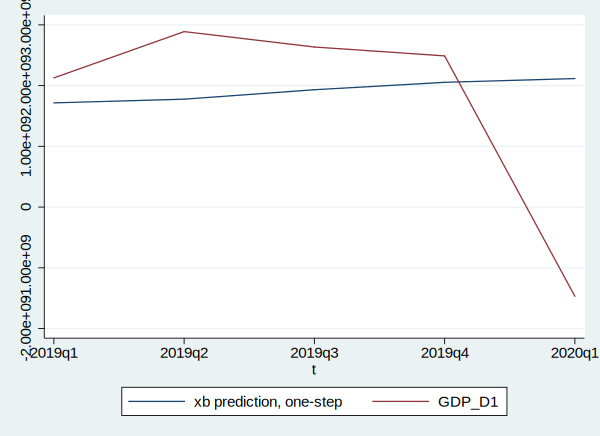

In [49]:
tsline yhat_AR_4 GDP_D1 if t>=tq(2019q1)

# (f)
## The partial autocorrelation of GDP_D1 shows that the first 6 period PACF value is outside the 95% confidence band. Hence, I choose order of MA to be 6 as the starting point. Please note that this method is very informal and can only be used as the starting point of modelling. The rigorous method is based on IC or cross-validation. 

In [50]:
arima GDP_D1 if t<=tq(2018q4), arima(0,0,6)


(setting optimization to BHHH)
Iteration 0:   log likelihood = -5321.1594  
Iteration 1:   log likelihood = -5319.2789  
Iteration 2:   log likelihood = -5318.6882  
Iteration 3:   log likelihood =  -5318.653  
Iteration 4:   log likelihood = -5318.6391  
(switching optimization to BFGS)
BFGS stepping has contracted, resetting BFGS Hessian (0)
Iteration 5:   log likelihood = -5318.6349  
Iteration 6:   log likelihood = -5318.6327  (backed up)
Iteration 7:   log likelihood = -5318.6326  (backed up)
Iteration 8:   log likelihood = -5318.6326  (backed up)
Iteration 9:   log likelihood = -5318.6326  
Iteration 10:  log likelihood = -5318.6325  
Iteration 11:  log likelihood = -5318.6325  (backed up)
Iteration 12:  log likelihood = -5318.6325  (backed up)
Iteration 13:  log likelihood = -5318.6325  
Iteration 14:  log likelihood = -5318.6325  
(switching optimization to BHHH)
Iteration 15:  log likelihood = -5318.6325  
Iteration 16:  log likelihood = -5318.6316  
Iteration 17:  log likeli

In [51]:
estat ic
matrix M_MA_IC=r(S)
scalar aic_ma = M_MA_IC[1, 5]
scalar bic_ma = M_MA_IC[1, 6]



Akaike's information criterion and Bayesian information criterion

-----------------------------------------------------------------------------
       Model |        Obs  ll(null)  ll(model)      df         AIC        BIC
-------------+---------------------------------------------------------------
           . |        235         .  -5318.631       8    10653.26   10680.94
-----------------------------------------------------------------------------
               Note: N=Obs used in calculating BIC; see [R] BIC note.





# (g)
## one-quarter ahead prediction based on MA(6) since 2018q4

In [22]:
predict yhat_MA_1 if t==tq(2019q1)
predict resd_MA_1 if t==tq(2019q1), residuals


(option xb assumed; predicted values)
(240 missing values generated)

(240 missing values generated)


In [23]:
list t yhat_MA_1 GDP_D1 resd_MA_1 if t==tq(2019q1)


     +-----------------------------------------+
     |      t   yhat_M~1     GDP_D1   resd_M~1 |
     |-----------------------------------------|
237. | 2019q1   1.72e+09   2.13e+09   4.09e+08 |
     +-----------------------------------------+


## 4-quarter ahead prediction based on MA(6) since 2018q4

In [24]:
predict yhat_MA_4 if t>=tq(2019q1)
predict resd_MA_4 if t>=tq(2019q1), residuals


(option xb assumed; predicted values)
(236 missing values generated)

(236 missing values generated)


In [25]:
list t yhat_MA_4 GDP_D1 resd_MA_4 if t>=tq(2019q1)


     +-------------------------------------------+
     |      t   yhat_M~4      GDP_D1   resd_MA_4 |
     |-------------------------------------------|
237. | 2019q1   1.72e+09    2.13e+09    4.09e+08 |
238. | 2019q2   1.76e+09    2.89e+09    1.13e+09 |
239. | 2019q3   1.89e+09    2.64e+09    7.46e+08 |
240. | 2019q4   2.01e+09    2.49e+09    4.79e+08 |
241. | 2020q1   2.08e+09   -1.47e+09   -3.55e+09 |
     +-------------------------------------------+


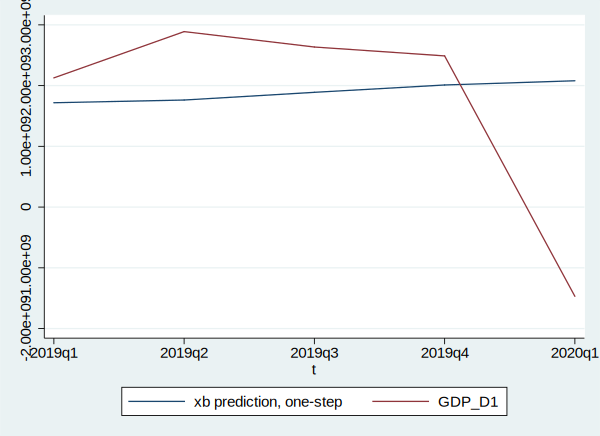

In [26]:
tsline yhat_MA_4 GDP_D1 if t>=tq(2019q1)

## which to choose : AR(5) or MA(6)

## Firstly, when you plot them together in one graph alongside with the true signal (GDP_D1), you will find they are equally bad. Both of them are far away from the true signal; both of them capture the wrong shape of the figure.

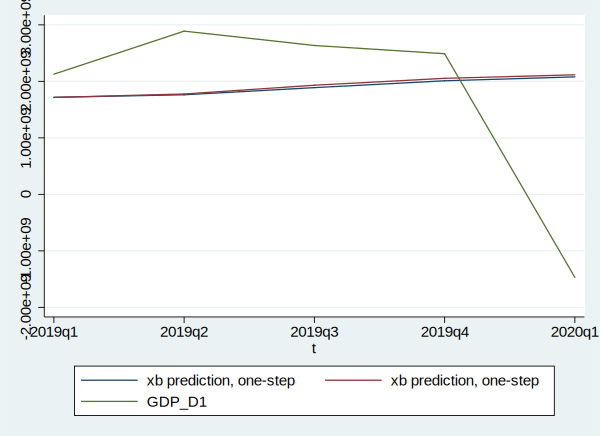

In [27]:
tsline yhat_MA_4 yhat_AR_4 GDP_D1 if t>=tq(2019q1)

## Secondly, you can verify this by using AIC/BIC for model selection. BIC shows that MA is marginally worse than AR while AIC shows the opposite. Their values in AIC (or BIC) are very close. This means AIC and BIC cannot have a consistent conclusion on the superiority of the model. Mostly of the time, this means they are equally bad.

In [28]:
scalar list

    bic_ma =   10680.94
    aic_ma =  10653.263
    bic_ar =  10678.032
    aic_ar =  10653.815
